#### source: https://towardsdatascience.com/a-practical-guide-on-missing-values-with-pandas-8fb3e0b46c24

Topic:
1. Missing value markers
2. Detecting missing values
3. Calculations with missing values
4. Handling missing values

In [1]:
import numpy as np
import pandas as pd
pd.__version__

'1.0.4'

## 1. Missing value markers

#### The default missing value representation in Pandas is NaN but Python’s None is also detected as missing value.

In [2]:
s = pd.Series([1, 3, 4, np.nan, None, 8])
s

0    1.0
1    3.0
2    4.0
3    NaN
4    NaN
5    8.0
dtype: float64

#### Although we created a series with integers, the values are upcasted to float because np.nan is float. A new representation for missing values is introduced with Pandas 1.0 which is <NA>. It can be used with integers without causing upcasting. We need to explicitly request the dtype to be pd.Int64Dtype().

In [3]:
s = pd.Series([1, 3, 4, np.nan, None, 8], dtype=pd.Int64Dtype())
s

0       1
1       3
2       4
3    <NA>
4    <NA>
5       8
dtype: Int64

#### The integer values are not upcasted to float. Another missing value representation is NaT which is used to represent datetime64[ns] datatypes.

Note: np.nan’s do not compare equal whereas None’s are considered as equal.

In [4]:
np.nan == np.nan

False

In [5]:
None == None

True

#### Not all missing values come in nice and clean np.nan or None format. For example, the dataset we work on may include “?” and “- -“ values in some cells. We can convert them to np.nan representation when reading the dataset into a pandas dataframe. We just need to pass these values to na_values parameter.

In [8]:
missing_value = ['?', '-']
df_test = pd.read_csv('animal.csv', na_values=missing_value)
df_test

,Unnamed: 0,animal,age,visits,priority
0,a,cat,2.5,1,yes
1,b,cat,3.0,3,yes
2,c,snake,0.5,2,no
3,d,dog,NaN,3,yes
4,e,dog,5.0,2,no
5,f,cat,1.5,3,no
6,g,snake,4.5,1,no
7,h,cat,NaN,1,yes
8,i,dog,7.0,2,no
9,j,dog,3.0,1,no


## 2. Detecting missing values

#### Create a new PD dataframe

In [9]:
df = pd.DataFrame({'col_a':np.random.randint(10, size=8),
                   'col_b':np.random.random(8),
                   'col_c':[True, False, True, False, False, True, True, False],
                   'col_d':pd.date_range('2020-01-01', periods=8),
                   'col_e':['A','A','A','B','B','B','C','C']
                   })
df

,col_a,col_b,col_c,col_d,col_e
0,9,0.288513,True,2020-01-01,A
1,2,0.683096,False,2020-01-02,A
2,2,0.987313,True,2020-01-03,A
3,4,0.088609,False,2020-01-04,B
4,4,0.934691,False,2020-01-05,B
5,5,0.412751,True,2020-01-06,B
6,8,0.357723,True,2020-01-07,C
7,4,0.844718,False,2020-01-08,C


In [10]:
df.iloc[2:4, 1:2] = np.nan
df.iloc[3:5, 3] = np.nan
df.iloc[[1,4,6], 0] = np.nan
df

,col_a,col_b,col_c,col_d,col_e
0,9.0,0.288513,True,2020-01-01,A
1,NaN,0.683096,False,2020-01-02,A
2,2.0,NaN,True,2020-01-03,A
3,4.0,NaN,False,NaT,B
4,NaN,0.934691,False,NaT,B
5,5.0,0.412751,True,2020-01-06,B
6,NaN,0.357723,True,2020-01-07,C
7,4.0,0.844718,False,2020-01-08,C


In [11]:
df.isna()

,col_a,col_b,col_c,col_d,col_e
0,False,False,False,False,False
1,True,False,False,False,False
2,False,True,False,False,False
3,False,True,False,True,False
4,True,False,False,True,False
5,False,False,False,False,False
6,True,False,False,False,False
7,False,False,False,False,False


In [12]:
df.isna().sum()

col_a    3
col_b    2
col_c    0
col_d    2
col_e    0
dtype: int64

In [13]:
df.notna().sum()

col_a    5
col_b    6
col_c    8
col_d    6
col_e    8
dtype: int64

#### returns a boolean value for each column. If there is at least one missing value in that column, the result is True.

In [14]:
df.isna().any()

col_a     True
col_b     True
col_c    False
col_d     True
col_e    False
dtype: bool

## 3. Calculations with missing values

In [15]:
df['sum_a_b'] = df['col_a'] + df['col_b']
df

,col_a,col_b,col_c,col_d,col_e,sum_a_b
0,9.0,0.288513,True,2020-01-01,A,9.288513
1,NaN,0.683096,False,2020-01-02,A,NaN
2,2.0,NaN,True,2020-01-03,A,NaN
3,4.0,NaN,False,NaT,B,NaN
4,NaN,0.934691,False,NaT,B,NaN
5,5.0,0.412751,True,2020-01-06,B,5.412751
6,NaN,0.357723,True,2020-01-07,C,NaN
7,4.0,0.844718,False,2020-01-08,C,4.844718


#### Cumulative methods like cumsum and cumprod ignore missing values by default but they preserve the positions of missing values.

In [16]:
df[['col_a','col_b']].cumsum()

,col_a,col_b
0,9.0,0.288513
1,NaN,0.971609
2,11.0,NaN
3,15.0,NaN
4,NaN,1.906300
5,20.0,2.319050
6,NaN,2.676774
7,24.0,3.521491


In [17]:
df[['col_a','col_b']].cumsum(skipna=False)

,col_a,col_b
0,9.0,0.288513
1,NaN,0.971609
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN


In [18]:
df[['col_e','col_a']].groupby('col_e').sum()

,col_a
col_e,
A,11.0
B,9.0
C,4.0


In [19]:
df[['col_e','col_a']]

,col_e,col_a
0,A,9.0
1,A,NaN
2,A,2.0
3,B,4.0
4,B,NaN
5,B,5.0
6,C,NaN
7,C,4.0


## 4. Handling missing values

#### Dropping missing values

We can drop a row or column with missing values using dropna() function. how parameter is used to set condition to drop.

how=’any’ : drop if there is any missing value

how=’all’ : drop if all values are missing

In [20]:
df.iloc[7,:] = np.nan
df

,col_a,col_b,col_c,col_d,col_e,sum_a_b
0,9.0,0.288513,1.0,2020-01-01,A,9.288513
1,NaN,0.683096,0.0,2020-01-02,A,NaN
2,2.0,NaN,1.0,2020-01-03,A,NaN
3,4.0,NaN,0.0,NaT,B,NaN
4,NaN,0.934691,0.0,NaT,B,NaN
5,5.0,0.412751,1.0,2020-01-06,B,5.412751
6,NaN,0.357723,1.0,2020-01-07,C,NaN
7,NaN,NaN,NaN,NaT,NaN,NaN


In [21]:
df.dropna(how='any')

,col_a,col_b,col_c,col_d,col_e,sum_a_b
0,9.0,0.288513,1.0,2020-01-01,A,9.288513
5,5.0,0.412751,1.0,2020-01-06,B,5.412751


In [22]:
df.dropna(how='all')

,col_a,col_b,col_c,col_d,col_e,sum_a_b
0,9.0,0.288513,1.0,2020-01-01,A,9.288513
1,NaN,0.683096,0.0,2020-01-02,A,NaN
2,2.0,NaN,1.0,2020-01-03,A,NaN
3,4.0,NaN,0.0,NaT,B,NaN
4,NaN,0.934691,0.0,NaT,B,NaN
5,5.0,0.412751,1.0,2020-01-06,B,5.412751
6,NaN,0.357723,1.0,2020-01-07,C,NaN


#### Note: In order to save these changes in the original dataframe, we need to set inplace parameter as True.
Using thresh parameter, we can set a threshold for missing values in order for a row/column to be dropped. Dropna also does column-wise operation if axis parameter is set to 1.

## 4. Handling missing values

In [24]:
df

,col_a,col_b,col_c,col_d,col_e,sum_a_b
0,9.0,0.288513,1.0,2020-01-01,A,9.288513
1,NaN,0.683096,0.0,2020-01-02,A,NaN
2,2.0,NaN,1.0,2020-01-03,A,NaN
3,4.0,NaN,0.0,NaT,B,NaN
4,NaN,0.934691,0.0,NaT,B,NaN
5,5.0,0.412751,1.0,2020-01-06,B,5.412751
6,NaN,0.357723,1.0,2020-01-07,C,NaN
7,NaN,NaN,NaN,NaT,NaN,NaN


In [25]:
replacements = {'col_a':0, 'col_b':0.5, 'col_e':'Other'}
df.fillna(replacements)

,col_a,col_b,col_c,col_d,col_e,sum_a_b
0,9.0,0.288513,1.0,2020-01-01,A,9.288513
1,0.0,0.683096,0.0,2020-01-02,A,NaN
2,2.0,0.500000,1.0,2020-01-03,A,NaN
3,4.0,0.500000,0.0,NaT,B,NaN
4,0.0,0.934691,0.0,NaT,B,NaN
5,5.0,0.412751,1.0,2020-01-06,B,5.412751
6,0.0,0.357723,1.0,2020-01-07,C,NaN
7,0.0,0.500000,NaN,NaT,Other,NaN


In [27]:
df['col_b'].fillna(df['col_b'].mean())  # mean = 0.535355

0    0.288513
1    0.683096
2    0.535355
3    0.535355
4    0.934691
5    0.412751
6    0.357723
7    0.535355
Name: col_b, dtype: float64

In [29]:
df.fillna(method='ffill')  # All the missing values are filled with the values in the previous cell

,col_a,col_b,col_c,col_d,col_e,sum_a_b
0,9.0,0.288513,1.0,2020-01-01,A,9.288513
1,9.0,0.683096,0.0,2020-01-02,A,9.288513
2,2.0,0.683096,1.0,2020-01-03,A,9.288513
3,4.0,0.683096,0.0,2020-01-03,B,9.288513
4,4.0,0.934691,0.0,2020-01-03,B,9.288513
5,5.0,0.412751,1.0,2020-01-06,B,5.412751
6,5.0,0.357723,1.0,2020-01-07,C,5.412751
7,5.0,0.357723,1.0,2020-01-07,C,5.412751


In [30]:
df.fillna(method='ffill', limit=1)

,col_a,col_b,col_c,col_d,col_e,sum_a_b
0,9.0,0.288513,1.0,2020-01-01,A,9.288513
1,9.0,0.683096,0.0,2020-01-02,A,9.288513
2,2.0,0.683096,1.0,2020-01-03,A,NaN
3,4.0,NaN,0.0,2020-01-03,B,NaN
4,4.0,0.934691,0.0,NaT,B,NaN
5,5.0,0.412751,1.0,2020-01-06,B,5.412751
6,5.0,0.357723,1.0,2020-01-07,C,5.412751
7,NaN,0.357723,1.0,2020-01-07,C,NaN


In [31]:
df.fillna(method='bfill')

,col_a,col_b,col_c,col_d,col_e,sum_a_b
0,9.0,0.288513,1.0,2020-01-01,A,9.288513
1,2.0,0.683096,0.0,2020-01-02,A,5.412751
2,2.0,0.934691,1.0,2020-01-03,A,5.412751
3,4.0,0.934691,0.0,2020-01-06,B,5.412751
4,5.0,0.934691,0.0,2020-01-06,B,5.412751
5,5.0,0.412751,1.0,2020-01-06,B,5.412751
6,NaN,0.357723,1.0,2020-01-07,C,NaN
7,NaN,NaN,NaN,NaT,NaN,NaN


## Interpolation

In [33]:
s = pd.Series(np.random.random(50))
s[4, 5, 9, 11, 18, 19, 33, 34, 46, 47, 48] = np.nan
s

0     0.963725
1     0.354954
2     0.225603
3     0.369403
4          NaN
5          NaN
6     0.316418
7     0.824228
8     0.221736
9          NaN
10    0.868609
11         NaN
12    0.536971
13    0.662685
14    0.339592
15    0.739500
16    0.813742
17    0.113799
18         NaN
19         NaN
20    0.046506
21    0.687980
22    0.498795
23    0.160194
24    0.573777
25    0.469406
26    0.206684
27    0.447548
28    0.776136
29    0.613293
30    0.514331
31    0.373979
32    0.192595
33         NaN
34         NaN
35    0.660938
36    0.551023
37    0.214631
38    0.205567
39    0.596178
40    0.605967
41    0.295997
42    0.910481
43    0.147687
44    0.338321
45    0.709276
46         NaN
47         NaN
48         NaN
49    0.535678
dtype: float64

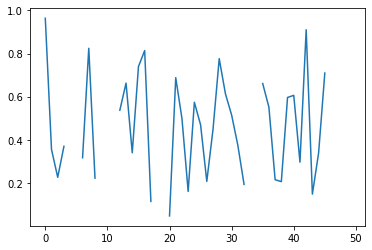

In [34]:
s.plot()

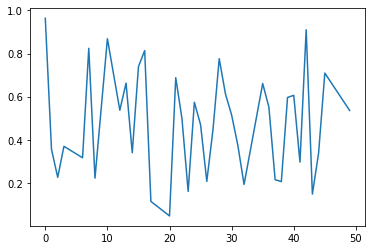

In [36]:
s.interpolate().plot()